In [ ]:
from __future__ import division, print_function

%matplotlib inline

import numpy as np
import bcolz
import pickle
import sys

In [ ]:
path = '../data/classification/glove/'

In [ ]:
def save_array(arr, filename):
    c = bcolz.carray(arr, rootdir=filename, mode='w')
    c.flush()

In [ ]:
def get_glove(name):    
    with open(path+ 'glove_' + name + '.txt', encoding="utf8") as f: 
        lines = [line.split() for line in f]
    
    words = [d[0] for d in lines]
    vecs = np.stack(np.array(d[1:], dtype=np.float32) for d in lines)
    wordidx = {o:i for i,o in enumerate(words)}
    
    # Save the vectors
    save_array(vecs, path+name+'_dat')
    # Save the words
    pickle.dump(words, open(path+name+'_words.pkl','wb'))
    # Save the word to index mapping
    pickle.dump(wordidx, open(path+name+'_idx.pkl','wb'))

In [ ]:
get_glove('6B_50d')

In [ ]:
# get_glove('6B_100d')

In [ ]:
# get_glove('6B_200d')

In [ ]:
# get_glove('6B_300d')

In [ ]:
def load_array(filename):
    return bcolz.open(filename)[:]

In [ ]:
def load_glove(loc):    
    return (load_array(loc+'_dat'), 
            pickle.load(open(loc+'_words.pkl','rb'), encoding='Latin1'), 
            pickle.load(open(loc+'_idx.pkl','rb'), encoding='Latin1'))

In [ ]:
vecs, words, wordidx = load_glove(path+'6B_50d')
vecs.shape

../data/classification/glove/6B_50d_dat


(400000, 50)

In [ ]:
' '.join(words[:25])

'the , . of to and in a " \'s for - that on is was said with he as it by at ( )'

In [ ]:
def w2v(w): 
    return vecs[wordidx[w]]

In [ ]:
w2v('of')

array([ 0.70853  ,  0.57088  , -0.4716   ,  0.18048  ,  0.54449  ,
        0.72603  ,  0.18157  , -0.52393  ,  0.10381  , -0.17566  ,
        0.078852 , -0.36216  , -0.11829  , -0.83336  ,  0.11917  ,
       -0.16605  ,  0.061555 , -0.012719 , -0.56623  ,  0.013616 ,
        0.22851  , -0.14396  , -0.067549 , -0.38157  , -0.23698  ,
       -1.7037   , -0.86692  , -0.26704  , -0.2589   ,  0.1767   ,
        3.8676   , -0.1613   , -0.13273  , -0.68881  ,  0.18444  ,
        0.0052464, -0.33874  , -0.078956 ,  0.24185  ,  0.36576  ,
       -0.34727  ,  0.28483  ,  0.075693 , -0.062178 , -0.38988  ,
        0.22902  , -0.21617  , -0.22562  , -0.093918 , -0.80375  ],
      dtype=float32)

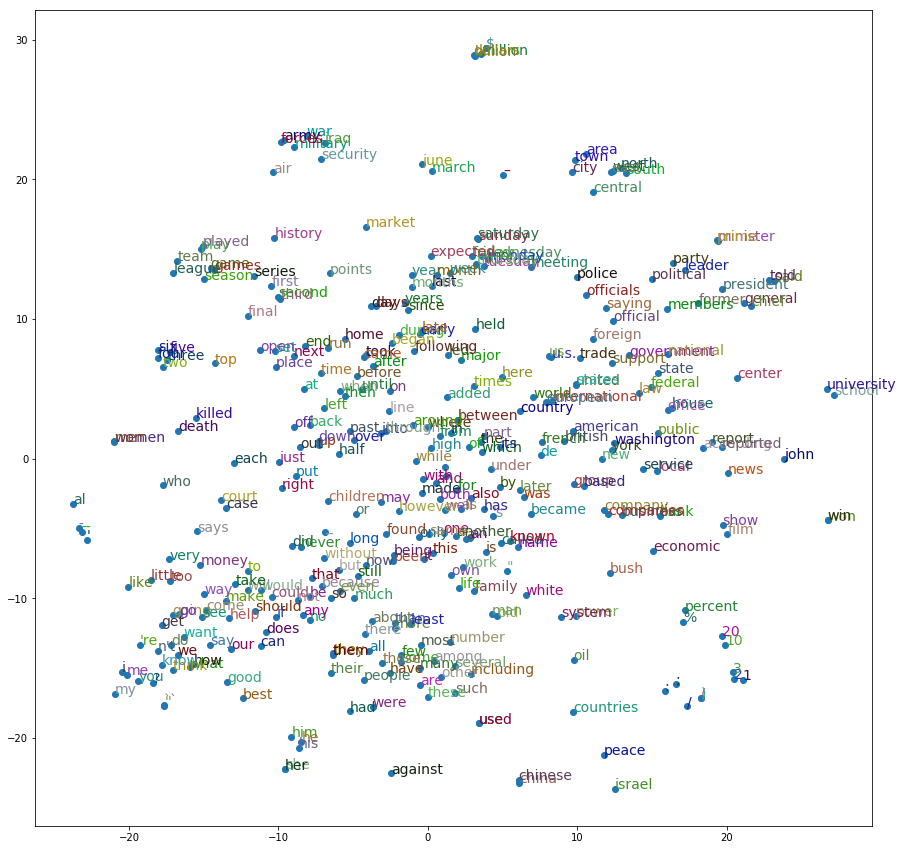

In [ ]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

tsne = TSNE(n_components=2, random_state=0)
Y = tsne.fit_transform(vecs[:500])

start=0; end=350
dat = Y[start:end]
plt.figure(figsize=(15,15))
plt.scatter(dat[:, 0], dat[:, 1])
for label, x, y in zip(words[start:end], dat[:, 0], dat[:, 1]):
    plt.text(x,y,label, color=np.random.rand(3)*0.7,
                 fontsize=14)
plt.show()